# Airbnb-Price-Predictions-Florida-Edition

## Summary
This notebook presents an analysis of Airbnb listing prices and explores different regression models to predict listing prices accurately.  

---

## Table of Contents

- [Intro](#Intro)
- [Modeling](#Linear-Regression)
- [Conclusion](#Conclusion)

---

## Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [41]:
listings_scaled = pd.read_csv('../data/scaled_encoded_data.csv')

In [42]:
# Relevant features and target variable
target = 'price'
features = [col for col in listings_scaled.columns.tolist() if col != target]


X = listings_scaled[features]
y = listings_scaled[target]

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [44]:
# Compute the mean
target_mean = np.mean(y_train) 

In [45]:
# Baseline prediction
baseline_predictions = np.full_like(y_test, target_mean)  

In [46]:
# Evaluate the baseline
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)

print("Baseline MSE:", baseline_mse)
print("Baseline MAE:", baseline_mae)

Baseline MSE: 0.9172954910210764
Baseline MAE: 0.46728049382996545


**In the provided baseline prediction, the mean of the target variable, which is the 'price', is calculated from the training data. This average price is then used as the predicted value for all instances in the testing set**.

## Modeling

#### Linear Regression

In [47]:
# Scale the features
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)

In [49]:
X_test_scaled = scaler.transform(X_test)

In [50]:
# Impute missing values
imputer = SimpleImputer()

In [51]:
X_train_imputed = imputer.fit_transform(X_train_scaled)

In [52]:
X_test_imputed = imputer.transform(X_test_scaled)

In [53]:
# Train the Linear Regression model
model = LinearRegression()

In [54]:
model.fit(X_train_imputed, y_train)

LinearRegression()

In [55]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)
y_pred

array([-0.46726789, -0.60038556, -0.26528348, ..., -0.58134259,
       -0.23722638, -0.56174077])

In [56]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Squared Error: 1.4459155540999761e+20
Mean Absolute Error: 396332391.12077
Root Mean Squared Error (RMSE): 12024622880.157099
R-squared (R^2): -1.5762891712534656e+20


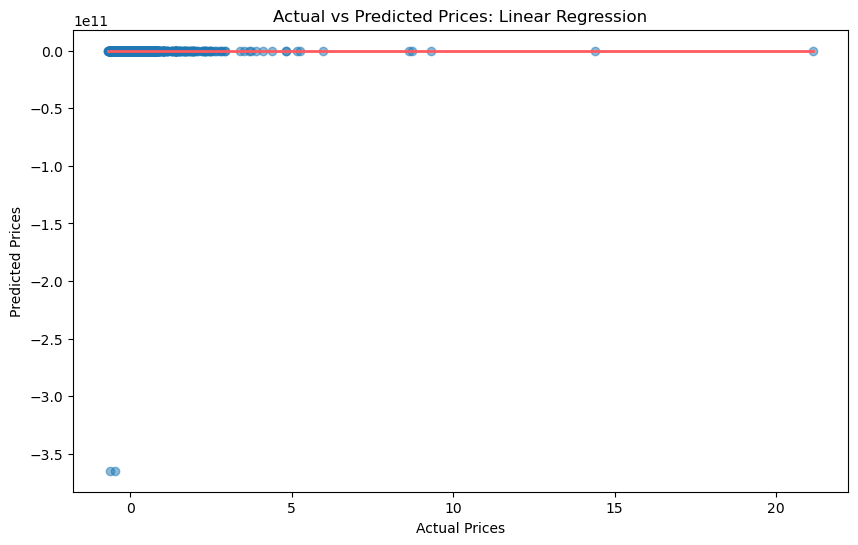

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices: Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#FF5A5F', lw=2)
plt.show()



**This observation implies that the model is excessively capturing the noise present in the training data rather than accurately capturing the underlying pattern or trend**.

#### Gradient Boosting

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Handle missing values
imputer = SimpleImputer()

In [60]:
X_train_imputed = imputer.fit_transform(X_train)

In [61]:
X_test_imputed = imputer.transform(X_test)

In [62]:
# Train the model
model = GradientBoostingRegressor()
model.fit(X_train_imputed, y_train)

GradientBoostingRegressor()

In [63]:
# Predict on the test set
y_pred = model.predict(X_test_imputed)
y_pred

array([-0.28710633, -0.45096475, -0.29933577, ..., -0.41194423,
       -0.35050948, -0.52160082])

In [64]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test_imputed, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Root Mean Squared Error (RMSE): 0.7298193392401527
R-squared (R^2): 0.4193376100198003
Mean Squared Error: 0.5326362679289331
Mean Absolute Error: 0.268667651056137


**The lower MSE and MAE values for the Gradient Boosting model imply that it outperforms the baseline model in predicting Airbnb listing prices, demonstrating its effectiveness in capturing the underlying patterns and trends that influence listing prices.The lower RMSE indicates better predictive accuracy, while the higher R^2 value indicates that the model explains a larger proportion of the variance in the target variable compared to the other models**

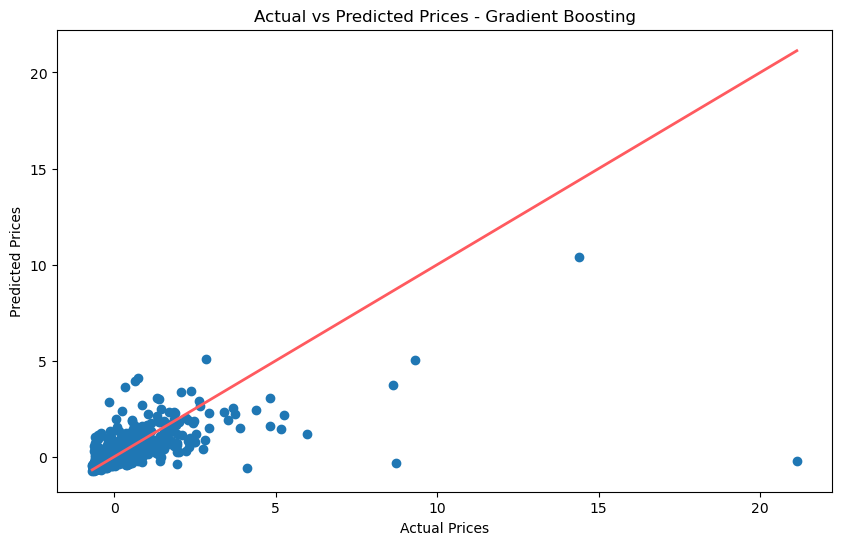

In [65]:
# Prediction vs Actual plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#FF5A5F', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices - Gradient Boosting")
plt.savefig('../charts/prediction_vs_actual_Gradient.png')
plt.show()


**The tight clustering observed between the actual and predicted values for the range of zero to two hundred dollars per night suggests that the Gradient Boosting model exhibits strong performance in predicting Airbnb listing prices within this specific price range. This indicates that the model effectively captures the underlying patterns and trends associated with listings in this price range**.

## Random Forest

In [66]:
rf_model = RandomForestRegressor()

In [67]:
rf_model.fit(X_train_imputed, y_train)

RandomForestRegressor()

In [68]:
# feature importances
feature_importances = rf_model.feature_importances_

In [69]:
# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(features)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

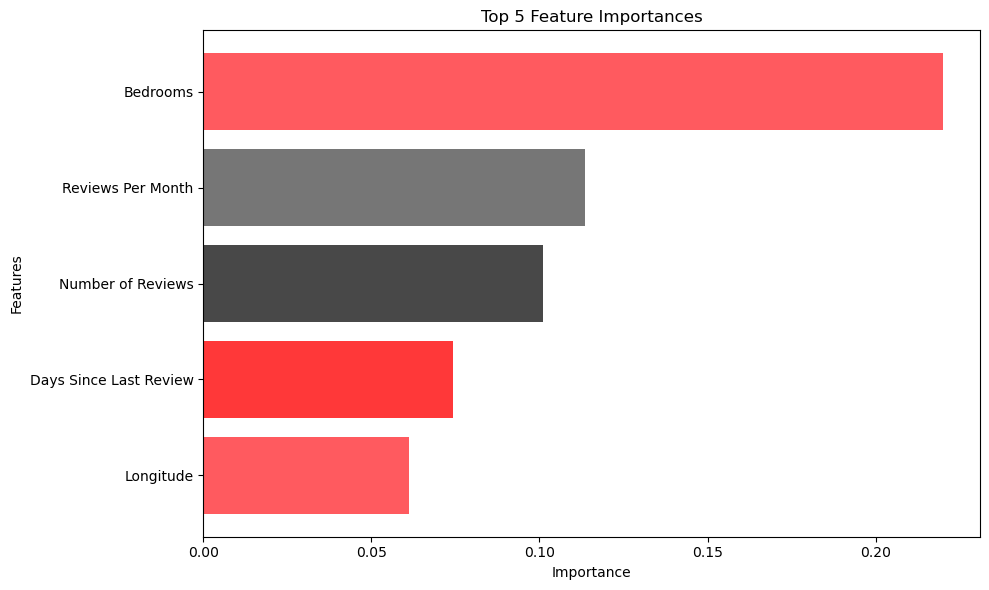

In [82]:
# Define custom feature names
custom_feature_names = ['Longitude', 'Days Since Last Review', 'Number of Reviews', 'Reviews Per Month', 'Bedrooms']

# Select top 5 features
top_features = sorted_features[:5]
top_importances = sorted_importances[:5]

# Reverse the order of the lists
top_features = top_features[::-1]
top_importances = top_importances[::-1]

# Define custom colors
airbnb_colors = ["#FF5A5F", "#FF3839", "#484848", "#767676"]

# Plot top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, color=airbnb_colors)
plt.yticks(range(len(top_features)), custom_feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 5 Feature Importances')

# Add tight layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('../charts/top_feature_importances.png')


**"Bedrooms," "Reviews Per Month," and "Number of Reviews" are among the top features suggests that these variables have a significant impact on predicting Airbnb prices in the given model**.

## LassoCV

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Scale the features
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)

In [30]:
X_test_scaled = scaler.transform(X_test)

In [31]:
# Impute missing values
imputer = SimpleImputer()

In [32]:
X_train_imputed = imputer.fit_transform(X_train_scaled)

In [33]:
X_test_imputed = imputer.transform(X_test_scaled)

In [34]:
# Train the LassoCV model
model = LassoCV(cv=5)

In [35]:
model.fit(X_train_imputed, y_train)

LassoCV(cv=5)

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

In [37]:
# Evaluate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test_imputed, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Root Mean Squared Error (RMSE): 0.8088042195472398
R-squared (R^2): 0.2868518184929635
Mean Squared Error: 0.6541642655574197
Mean Absolute Error: 0.3182625342951043


**The LassoCV model has an RMSE of 0.8088, indicating that, on average, its predictions deviate from the actual values by around 0.8088 units. The R^2 value of 0.2869 suggests that the model explains approximately 28.7% of the variance in the target variable, capturing some underlying patterns but leaving a significant portion unexplained. The MSE of 0.6542 represents the average squared difference between predictions and actual values, reflecting the overall magnitude of prediction errors. The MAE of 0.3183 represents the average absolute difference between predictions and actual values, providing an average magnitude of errors regardless of their direction**.

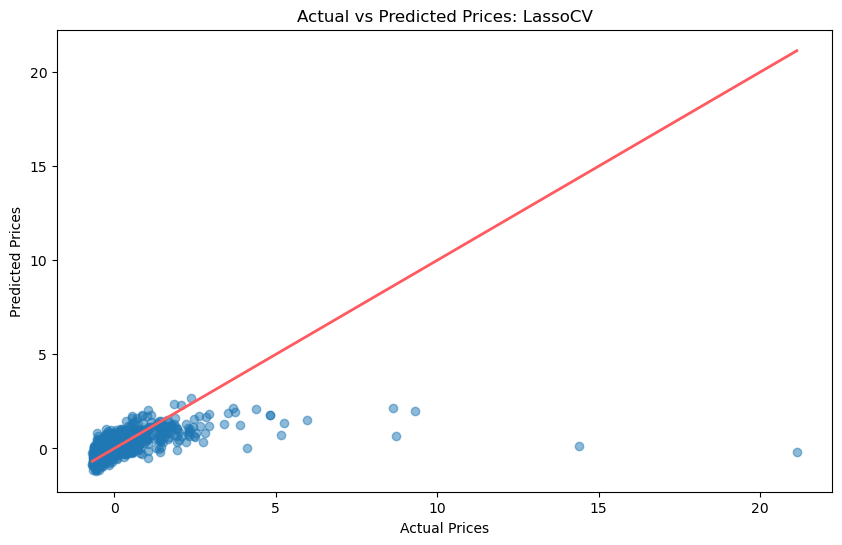

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices: LassoCV')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#FF5A5F', lw=2)
plt.show()


## RidgeCV

In [39]:
# Define alphas
alphas = np.logspace(-4, 4, 9)

In [40]:
# RidgeCV model
ridge = RidgeCV(alphas=alphas, cv=5)

In [41]:
# Fit the model
ridge.fit(X_train_imputed, y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
        cv=5)

In [42]:
print("Best alpha:", ridge.alpha_)

Best alpha: 100.0


In [43]:
y_pred = ridge.predict(X_test_imputed)
y_pred

array([-0.51673048, -0.67383494, -0.19628714, ..., -0.51337773,
       -0.36195897, -0.57749749])

In [44]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test_imputed, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Root Mean Squared Error (RMSE): 0.8092855680495502
R-squared (R^2): 0.2868518184929635
Mean Squared Error: 0.6549431306532832
Mean Absolute Error: 0.32253853886203726


**The RidgeCV model has an RMSE of 0.8093, indicating that, on average, its predictions deviate from the actual values by approximately 0.8093 units. The R^2 value of 0.2869 suggests that the model explains around 28.7% of the variance in the target variable, capturing some underlying patterns but leaving a significant portion unexplained. The MSE of 0.6549 represents the average squared difference between predictions and actual values, reflecting the overall magnitude of prediction errors. The MAE of 0.3225 represents the average absolute difference between predictions and actual values, providing an average magnitude of errors regardless of their direction**.

In [45]:
# 5-fold cross-validation
cv_scores = cross_val_score(ridge, X_train_imputed, y_train, cv=5)
cv_scores

array([0.25636312, 0.40352777, 0.24278755, 0.21382238, 0.34146433])

In [46]:
# Output cross-validation scores
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.25636312 0.40352777 0.24278755 0.21382238 0.34146433]
Mean cross-validation score (5-fold): 0.292


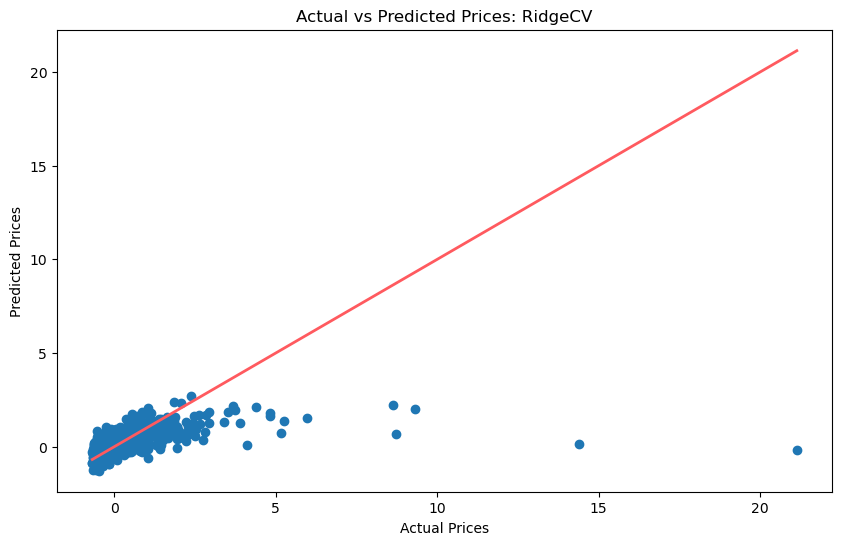

In [47]:
# Prediction vs Actual plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#FF5A5F', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices: RidgeCV")
plt.show()


## Conclusion

**The dataset contains information about Airbnb listings in Florida, including various features such as the number of bedrooms, reviews per month, and the number of reviews. The analysis revealed that "Bedrooms," "Reviews Per Month," and "Number of Reviews" are among the top features that significantly impact the prediction of Airbnb prices in the given model. These variables showcase their importance in determining the pricing dynamics in the Florida Airbnb market**.

**After evaluating different regression models, including LassoCV, RidgeCV, and Gradient Boosting, we determined that the Gradient Boosting model performed the best, providing the most accurate predictions. The other models, LassoCV and RidgeCV, also performed reasonably well but were slightly less accurate. However, the basic Linear Regression model did not perform well at all. These results indicate that the Gradient Boosting model is the most reliable for making predictions in this scenario. Its ability to capture complex interactions between variables and handle non-linear relationships makes it well-suited for accurately predicting Airbnb prices in Florida**